# Exploratory Data Analysis [Outliers - Height Data]

Methods of measurement included: Variance, Standard Deviation, Skewness, Percentiles, and Ranges

## Data Preparation

#### Load package

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

%matplotlib inline

## Gaussian Probability Distribution

#### Load dataset

In [32]:
# load csv data

df = pd.read_csv('height_weight.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [33]:
# add new column : Weight(Kg)

df['Weight(Kg)'] = df['Weight(Pounds)'] * 0.453592
df['Height(cm)'] = df['Height(Inches)'] * 2.54
df.head()

,Index,Height(Inches),Weight(Pounds),Weight(Kg),Height(cm)
0,1,65.78331,112.9925,51.252494,167.089607
1,2,71.51521,136.4873,61.909547,181.648633
2,3,69.39874,153.0269,69.411778,176.272800
3,4,68.21660,142.3354,64.562199,173.270164
4,5,67.78781,144.2971,65.452010,172.181037


In [34]:
# describe dataset

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Index,25000.0,12500.500000,7217.022701,1.000000,6250.750000,12500.500000,18750.250000,25000.000000
Height(Inches),25000.0,67.993114,1.901679,60.278360,66.704397,67.995700,69.272958,75.152800
Weight(Pounds),25000.0,127.079421,11.660898,78.014760,119.308675,127.157750,134.892850,170.924000
Weight(Kg),25000.0,57.642209,5.289290,35.386871,54.117461,57.677738,61.186318,77.529759
Height(cm),25000.0,172.702509,4.830264,153.107034,169.429170,172.709078,175.953312,190.888112


In [35]:
# set dataset
# we have to sort the value of x in accending order

x = df['Height(cm)']
x = x.sort_values()
mean = np.mean(x)
std_dev = np.std(x, ddof = 1)

#### Gaussian Probability Density Function

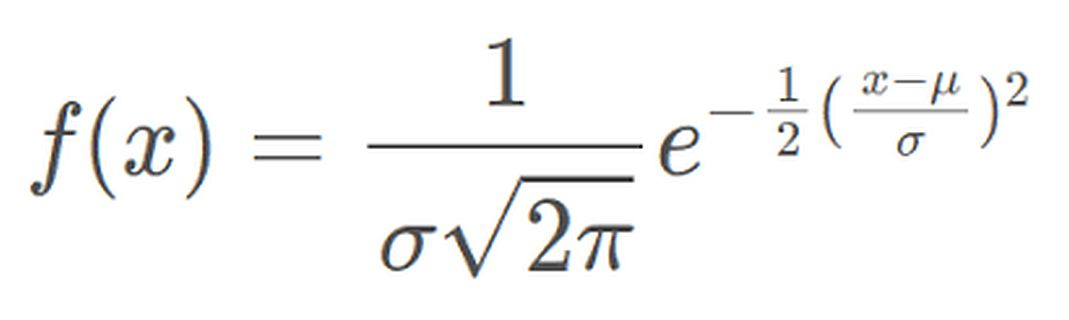

In [36]:
fx = np.exp(( -(x - mean) ** 2)/(2 * (std_dev ** 2)))/ ((2 * np.pi * std_dev ** 2) ** 0.5)

## Plot Normal Distribution 68-95-99.7 rule

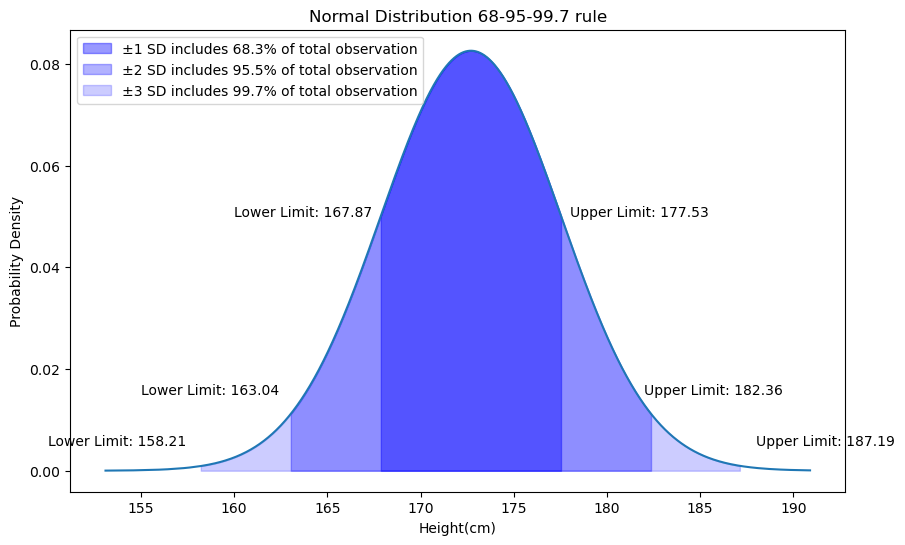

In [37]:
# Normal Distribution 68-95-99.7 rule

plt.figure(figsize = (10,6))
plt.plot(x,fx) 
plt.fill_between(x, fx, where = (x >= mean - 1 * std_dev) & (x <= mean + 1 * std_dev)  , color = "blue", alpha = 0.4 , label = '±1 SD includes 68.3% of total observation')
plt.fill_between(x, fx, where = (x >= mean - 2 * std_dev) & (x <= mean + 2 * std_dev)  , color = "blue", alpha = 0.3 , label = '±2 SD includes 95.5% of total observation')
plt.fill_between(x, fx, where = (x >= mean - 3 * std_dev) & (x <= mean + 3 * std_dev)  , color = "blue", alpha = 0.2 , label = '±3 SD includes 99.7% of total observation')
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.title('Normal Distribution 68-95-99.7 rule')
plt.text(160, 0.05, f'Lower Limit: {round(mean - 1 * std_dev,2)}')
plt.text(178, 0.05, f'Upper Limit: {round(mean + 1 * std_dev,2)}')
plt.text(155, 0.015, f'Lower Limit: {round(mean - 2 * std_dev,2)}')
plt.text(182, 0.015, f'Upper Limit: {round(mean + 2 * std_dev,2)}')
plt.text(150, 0.005, f'Lower Limit: {round(mean - 3 * std_dev,2)}')
plt.text(188, 0.005, f'Upper Limit: {round(mean + 3 * std_dev,2)}')
plt.legend()

# Outliers

Outliers by Malcolm Gladwell

"Outliers are those that have been given an opportunities - and who have had the strength and presence of mind to seize them.”

#### Overview
Outliers are rare, distinct, and does not fit the whole dataset.

Sometimes our dataset contain extreme values that is outside of our expected range. We need to understand and if necessary, remove these outliers. Removing these outliers is important step to ensure that the observation best represent the whole population.

#### Outliers causes

1. Measurement error or Input Error
2. Data Corruption
3. True outliers

#### Methods to remove outliers

1. Standard Deviation Method
2. Interquantile (IQR Based) method
3. Percentile method

## [1] Removing Outliers - Standard Deviation method

If we know that the distribution of values in the sample is Gaussian or Gaussian-like (Normal Distribution) , we can use the standard deviation of the sample as a cut-off for identifying outliers.

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

Text(188, 0.005, 'Upper Limit: 187.19')

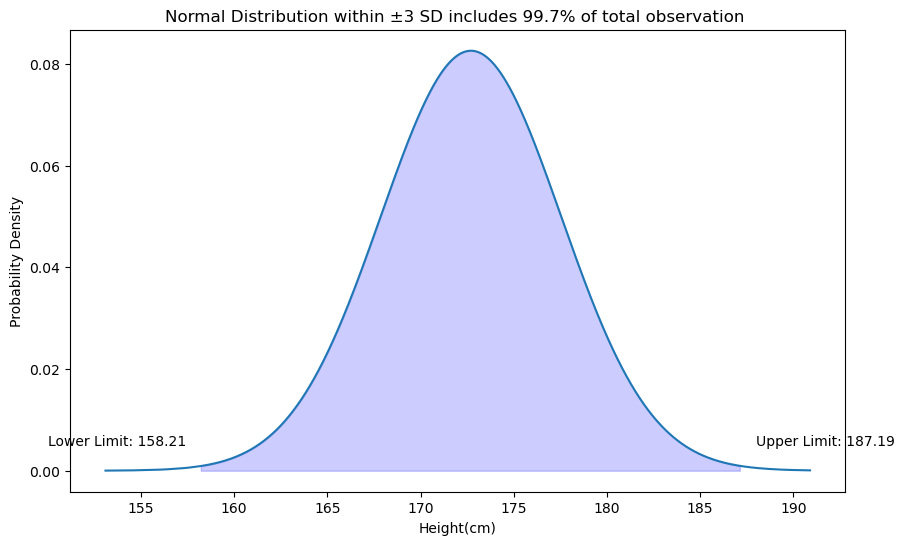

In [38]:
# Normal Distribution within ±3 SD
plt.figure(figsize = (10,6))
plt.plot(x,fx) 
plt.fill_between(x, fx, where = (x >= mean - 3 * std_dev) & (x <= mean + 3 * std_dev)  , color = "blue", alpha = 0.2 )
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.title('Normal Distribution within ±3 SD includes 99.7% of total observation ')
plt.text(150, 0.005, f'Lower Limit: {round(mean - 3 * std_dev,2)}')
plt.text(188, 0.005, f'Upper Limit: {round(mean + 3 * std_dev,2)}')

In [39]:
# set dataset

x = df['Height(cm)']
x = x.sort_values()
mean = np.mean(x)
std_dev = np.std(x, ddof = 1)

In [40]:
# cut off

cut_off = 3 * std_dev

# lower limit and upper limit

lower_limit = mean - cut_off
upper_limit = mean + cut_off

In [41]:
# Identify all outlier

outliers = df[(df['Height(cm)'] <= lower_limit) | (df['Height(cm)'] >= upper_limit)]
print(f'Number of outliers: { len(outliers)}')

print(f'''
Lower limit according to standard deviation method is {round(lower_limit,2)}cm.
Upper limit according to standard deviation method is {round(upper_limit,2)}cm.
    '''
)

Number of outliers: 51

Lower limit according to standard deviation method is 158.21cm.
Upper limit according to standard deviation method is 187.19cm.
    


In [42]:
# Identify all outliers

outliers = df[(df['Height(cm)'] <= lower_limit) | (df['Height(cm)'] >= upper_limit)]
outliers.head()

,Index,Height(Inches),Weight(Pounds),Weight(Kg),Height(cm)
138,139,73.90107,151.3913,68.669883,187.708718
174,175,73.83364,139.2983,63.184594,187.537446
412,413,62.01666,109.0848,49.479993,157.522316
1162,1163,74.24899,150.2167,68.137093,188.592435
1383,1384,74.19488,129.0597,58.540447,188.454995


## [2] Removing Outliers - IQR (Interquantile) Method

A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.\
IQR Method is suitable for treating skewed distribution. In a skewed distribution, the data tend to be concentrated towards one side, resulting in a long tail on either the left or right side of the distribution.

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

Remember that percentiles can be calculated by sorting the observations and selecting values at specific indices. The 50th percentile is the middle value, or the average of the two middle values for an even number of examples.

We refer to the percentiles as quartiles (“quart” meaning 4) because the data is divided into four groups via the 25th, 50th and 75th values.

Refer below for more information regarding IQR Method:\
The minimum of data is: Q1 - 1.5 * IQR\
The maximum of data is: Q3 + 1.5 * IQR

In [43]:
# Quantile

quantile = np.quantile(x,[0.25, 0.50, 0.75])
Q1 = quantile[0]
Q3 = quantile[2]
IQR = Q3 - Q1 

In [44]:
# Upper limit and lower limit

lower_limit = Q1 - IQR
upper_limit = Q3 + IQR

In [45]:
# Identify all outlier

outliers = df[(df['Height(cm)'] <= lower_limit) | (df['Height(cm)'] >= upper_limit)]
print(f'Number of outliers: { len(outliers)}')

print(f'''
Lower limit according to standard deviation method is {round(lower_limit,2)}cm.
Upper limit according to standard deviation method is {round(upper_limit,2)}cm.
    '''
)

Number of outliers: 1058

Lower limit according to standard deviation method is 162.91cm.
Upper limit according to standard deviation method is 182.48cm.
    


In [46]:
# Identify all outliers

outliers = df[(df['Height(cm)'] <= lower_limit) | (df['Height(cm)'] >= upper_limit)]
outliers

,Index,Height(Inches),Weight(Pounds),Weight(Kg),Height(cm)
22,23,63.48115,97.90191,44.407523,161.242121
39,40,64.04535,106.71150,48.403483,162.675189
97,98,63.42577,123.09720,55.835905,161.101456
109,110,63.83624,127.19410,57.694226,162.144050
138,139,73.90107,151.39130,68.669883,187.708718
...,...,...,...,...,...
24921,24922,72.54953,134.51430,61.014610,184.275806
24939,24940,72.35889,143.95470,65.296700,183.791581
24969,24970,63.61791,115.74770,52.502231,161.589491
24983,24984,63.77967,111.49110,50.571471,162.000362


## [3] Removing Outliers - Percentile Method

Use a percentile-based approach.\
For Example, data points that are far from the 99% percentile and less than 1 percentile are considered an outlier.

The percentile method is a technique used to treat outliers by identifying and capping extreme values based on a specified percentage threshold. It involves calculating the threshold values based on percentiles and replacing any data points that exceed these threshold with the corresponding threshold value.

The process to handle outliers using this method is:
1. Determine the percentage threshold. Select a percentage value that represent the threshold for extreme values. Commonly ised threshold are 95th Percentile(5% of datapoints are considered outliers) and 99th Percentile (1% of datapoints are considered outliers).
2. Calculate the threshold value. Use the chosen percentile to calculate the upper and lower threshold.
3. Identify and replace outliers. Iterate through the dataset and identify any data that exceed the upper or lower threshold.

In [47]:
# upper limit and lower limit

lower_limit = np.quantile(x,0.01)
upper_limit = np.quantile(x,0.99)

In [48]:
# Identify all outlier

outliers = df[(df['Height(cm)'] <= lower_limit) | (df['Height(cm)'] >= upper_limit)]
print(f'Number of outliers: { len(outliers)}')

print(f'''
Lower limit according to standard deviation method is {round(lower_limit,2)}cm.
Upper limit according to standard deviation method is {round(upper_limit,2)}cm.
    '''
)

Number of outliers: 500

Lower limit according to standard deviation method is 161.54cm.
Upper limit according to standard deviation method is 183.83cm.
    


In [49]:
# Identify all outliers

outliers = df[(df['Height(cm)'] <= lower_limit) | (df['Height(cm)'] >= upper_limit)]
outliers

,Index,Height(Inches),Weight(Pounds),Weight(Kg),Height(cm)
22,23,63.48115,97.90191,44.407523,161.242121
97,98,63.42577,123.09720,55.835905,161.101456
138,139,73.90107,151.39130,68.669883,187.708718
154,155,72.44434,136.73970,62.024034,184.008624
174,175,73.83364,139.29830,63.184594,187.537446
...,...,...,...,...,...
24781,24782,63.28029,116.05980,52.643797,160.731937
24801,24802,74.53177,148.91040,67.544566,189.310696
24868,24869,63.23624,97.99816,44.451181,160.620050
24883,24884,73.06241,141.50540,64.185717,185.578521
